# Processing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn import metrics, tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import RFE

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')


In [2]:
dataframe = pd.read_csv('../database/train/train_1st.csv')
dataframe.columns
# dataframe.info()

Index(['revenue_n_1', 'arpu_n_1', 'td_thoai_n_1', 'value_thoai_n_1',
       'td_data_n_1', 'value_data_n_1', 'revenue_n_2', 'arpu_n_2',
       'td_thoai_n_2', 'value_thoai_n_2', 'td_data_n_2', 'value_data_n_2',
       'duration_n_0', 'duration_n_1', 'duration_n_2', 'revenue_n_1_to_n_2',
       'td_thoai_n_1_to_n_2', 'value_thoai_n_1_to_n_2', 'td_data_n_1_to_n_2',
       'value_data_n_1_to_n_2', 'segment_n_1', 'segment_n_2',
       'cycle_changed?'],
      dtype='object')

In [3]:
used_data = dataframe.copy()
used_data = dataframe.drop(['duration_n_0'], axis = 1)
# print(len(used_data.columns), used_data.shape)
# used_data.head()
used_data.columns

Index(['revenue_n_1', 'arpu_n_1', 'td_thoai_n_1', 'value_thoai_n_1',
       'td_data_n_1', 'value_data_n_1', 'revenue_n_2', 'arpu_n_2',
       'td_thoai_n_2', 'value_thoai_n_2', 'td_data_n_2', 'value_data_n_2',
       'duration_n_1', 'duration_n_2', 'revenue_n_1_to_n_2',
       'td_thoai_n_1_to_n_2', 'value_thoai_n_1_to_n_2', 'td_data_n_1_to_n_2',
       'value_data_n_1_to_n_2', 'segment_n_1', 'segment_n_2',
       'cycle_changed?'],
      dtype='object')

## Scaler

In [5]:
print(len(used_data))
scaled_df = used_data[np.isfinite(used_data).all(1)]

print(len(scaled_df))
scaler = MinMaxScaler()
num_cols = ['revenue_n_1', 'arpu_n_1', 'td_thoai_n_1',
       'value_thoai_n_1', 'td_data_n_1', 'value_data_n_1', 'revenue_n_2',
       'arpu_n_2', 'td_thoai_n_2', 'value_thoai_n_2', 'td_data_n_2', 'value_data_n_2',
       'revenue_n_1_to_n_2', 'td_thoai_n_1_to_n_2', 'value_thoai_n_1_to_n_2', 'td_data_n_1_to_n_2', 'value_data_n_1_to_n_2']
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])
scaled_df.head()

118349
118349


,revenue_n_1,arpu_n_1,td_thoai_n_1,value_thoai_n_1,td_data_n_1,value_data_n_1,revenue_n_2,arpu_n_2,td_thoai_n_2,value_thoai_n_2,...,duration_n_1,duration_n_2,revenue_n_1_to_n_2,td_thoai_n_1_to_n_2,value_thoai_n_1_to_n_2,td_data_n_1_to_n_2,value_data_n_1_to_n_2,segment_n_1,segment_n_2,cycle_changed?
0,0.059168,0.075500,0.016842,0.341821,0.230652,0.010789,0.093784,0.116848,0.016730,0.192250,...,1.0,6,0.267066,0.547737,0.742246,0.236765,0.218556,9,9,1
1,0.059168,0.075500,0.016842,0.341821,0.230652,0.010789,0.093784,0.116848,0.016730,0.192250,...,6.0,6,0.267066,0.547737,0.742246,0.236765,0.218556,9,9,1
2,0.845742,0.891982,0.889698,0.367729,0.572650,0.256519,0.874779,0.917075,0.893736,0.460816,...,12.0,12,0.256913,0.541640,0.309935,0.236765,0.180825,9,9,1
3,0.845742,0.891982,0.889698,0.367729,0.572650,0.256519,0.874779,0.917075,0.893736,0.460816,...,1.0,12,0.256913,0.541640,0.309935,0.236765,0.180825,9,9,1
4,0.369965,0.396727,0.590643,0.104648,0.076923,0.007837,0.396687,0.450014,0.586719,0.125575,...,1.0,1,0.269951,0.547737,0.326611,0.236765,0.476233,9,9,0


## One-hot encoder

In [8]:
# encoder = OneHotEncoder(sparse=False)
cat_cols = ['segment_n_1', 'segment_n_2', 'segment_n_3']

df_encoded = pd.get_dummies(scaled_df, columns=cat_cols, prefix=cat_cols)

print(f'shape of dataframe: {df_encoded.shape}')
df_encoded.head()

shape of dataframe: (111016, 73)


,subtype,revenue_n_1,arpu_n_1,value_thoai_n_1,value_data_n_1,revenue_n_2,arpu_n_2,value_thoai_n_2,value_data_n_2,revenue_n_3,...,segment_n_2_9,segment_n_3_1,segment_n_3_2,segment_n_3_3,segment_n_3_4,segment_n_3_5,segment_n_3_6,segment_n_3_7,segment_n_3_8,segment_n_3_9
0,1,0.512330,0.269026,-0.055631,0.289480,-0.544764,-0.107709,-0.152893,-0.405190,0.422874,...,1,0,0,0,0,0,0,0,0,1
1,1,0.079087,0.163757,-0.107830,-0.183992,0.047374,0.064945,0.058998,0.273020,0.151828,...,1,0,0,0,0,0,0,0,0,1
2,0,-0.936443,-0.758479,-0.107830,-0.048885,-0.964054,-0.427854,-0.181133,-0.567343,-0.079249,...,1,0,1,0,0,0,0,0,0,0
5,1,-0.021719,0.042881,-0.104663,-0.422118,0.047374,0.064945,0.058998,0.273020,-0.005456,...,1,0,0,0,0,0,0,0,0,1
7,1,-0.040387,0.020497,0.004369,-0.427273,0.047374,0.064945,0.058998,0.273020,-0.034583,...,1,0,0,0,0,0,0,0,0,1


# Training

In [6]:
target = scaled_df['cycle_changed?']
features = scaled_df.drop('cycle_changed?', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    shuffle=True, 
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    # prec = metrics.precision_score(y_test, y_pred)
    # rec = metrics.recall_score(y_test, y_pred)
    # f1= metrics.f1_score(y_test, y_pred)
    cls_report = classification_report(y_test, y_pred)

    # kappa = metrics.cohen_kappa_score(y_test, y_pred)
    # y_pred_proba = model.predict_proba(x_test)[::,1]
    # fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    # auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'cls_report': cls_report, 'cm': cm} #'kappa': kappa, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}


### Decision Tree

In [29]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
dtc_eval = evaluate_model(dtc, X_test, y_test)
print(dtc.get_params())
print(dtc_eval['cls_report'])

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17845
           1       0.80      0.77      0.79      5825

    accuracy                           0.90     23670
   macro avg       0.87      0.85      0.86     23670
weighted avg       0.90      0.90      0.90     23670



### Random Forest

In [8]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
rf_eval = evaluate_model(rf, X_test, y_test)
print(rf_eval['cls_report'])
print(rf_eval['cm'])

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17845
           1       0.85      0.84      0.84      5825

    accuracy                           0.92     23670
   macro avg       0.90      0.89      0.89     23670
weighted avg       0.92      0.92      0.92     23670

[[16963   882]
 [  958  4867]]


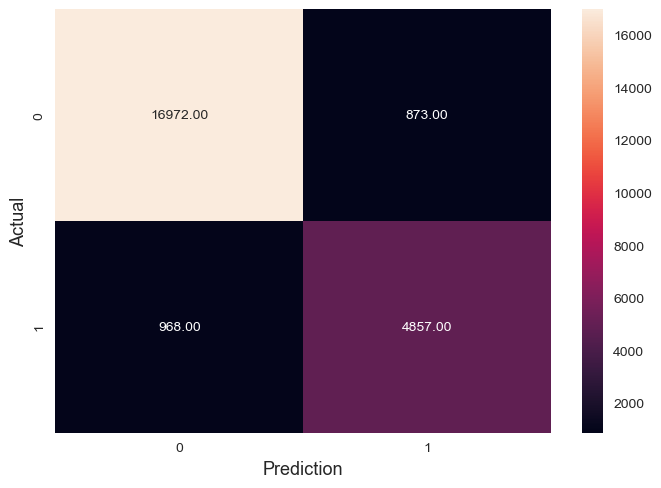

In [11]:
durations = [0, 1]
cmn  = rf_eval['cm']#.astype('float') / rf_eval['cm'].sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=durations, yticklabels=durations)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

#### Corr Heatmap

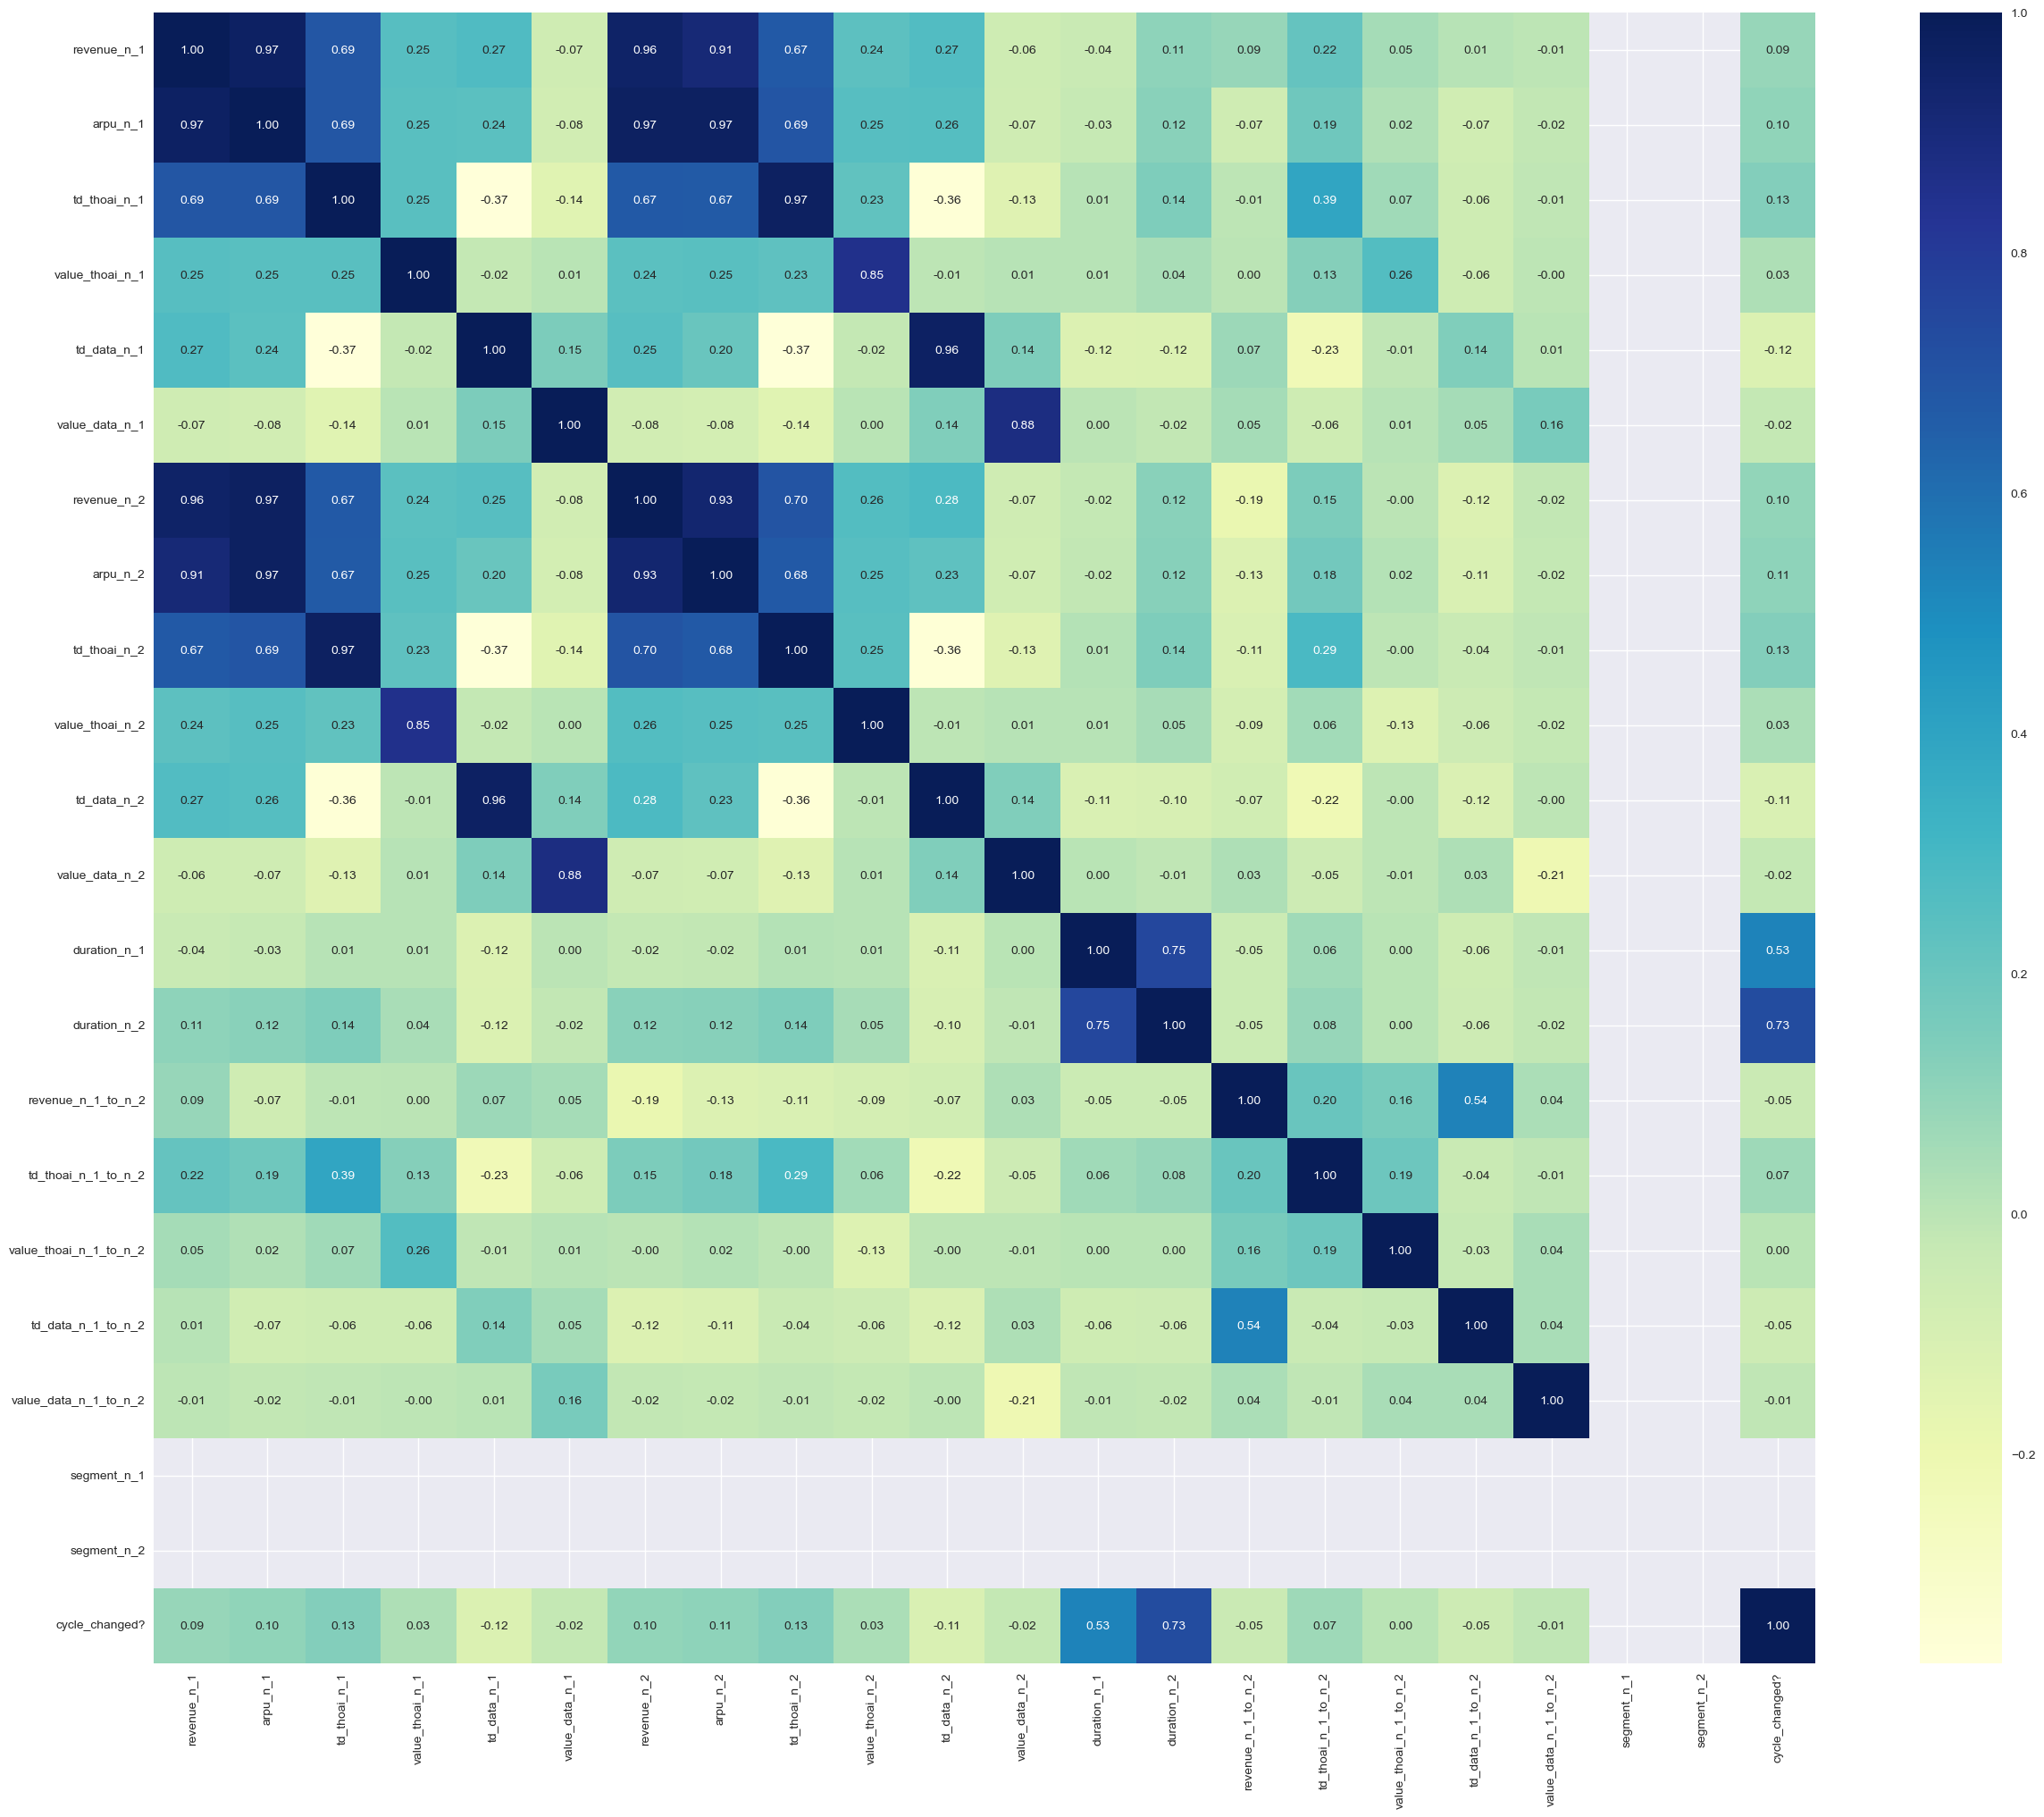

In [12]:
f, ax = plt.subplots(figsize=(30, 24))
corr = scaled_df.corr()
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

In [13]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

duration_n_2              0.420366
duration_n_1              0.153616
td_data_n_1               0.040956
td_data_n_2               0.039550
arpu_n_2                  0.027869
arpu_n_1                  0.027304
revenue_n_2               0.026239
td_thoai_n_1              0.025304
td_thoai_n_2              0.024939
revenue_n_1               0.024216
value_thoai_n_1           0.023012
value_data_n_1            0.023007
value_data_n_1_to_n_2     0.022967
value_data_n_2            0.022912
revenue_n_1_to_n_2        0.022699
value_thoai_n_2           0.022597
value_thoai_n_1_to_n_2    0.022016
td_thoai_n_1_to_n_2       0.016510
td_data_n_1_to_n_2        0.013919
segment_n_1               0.000000
segment_n_2               0.000000
dtype: float64

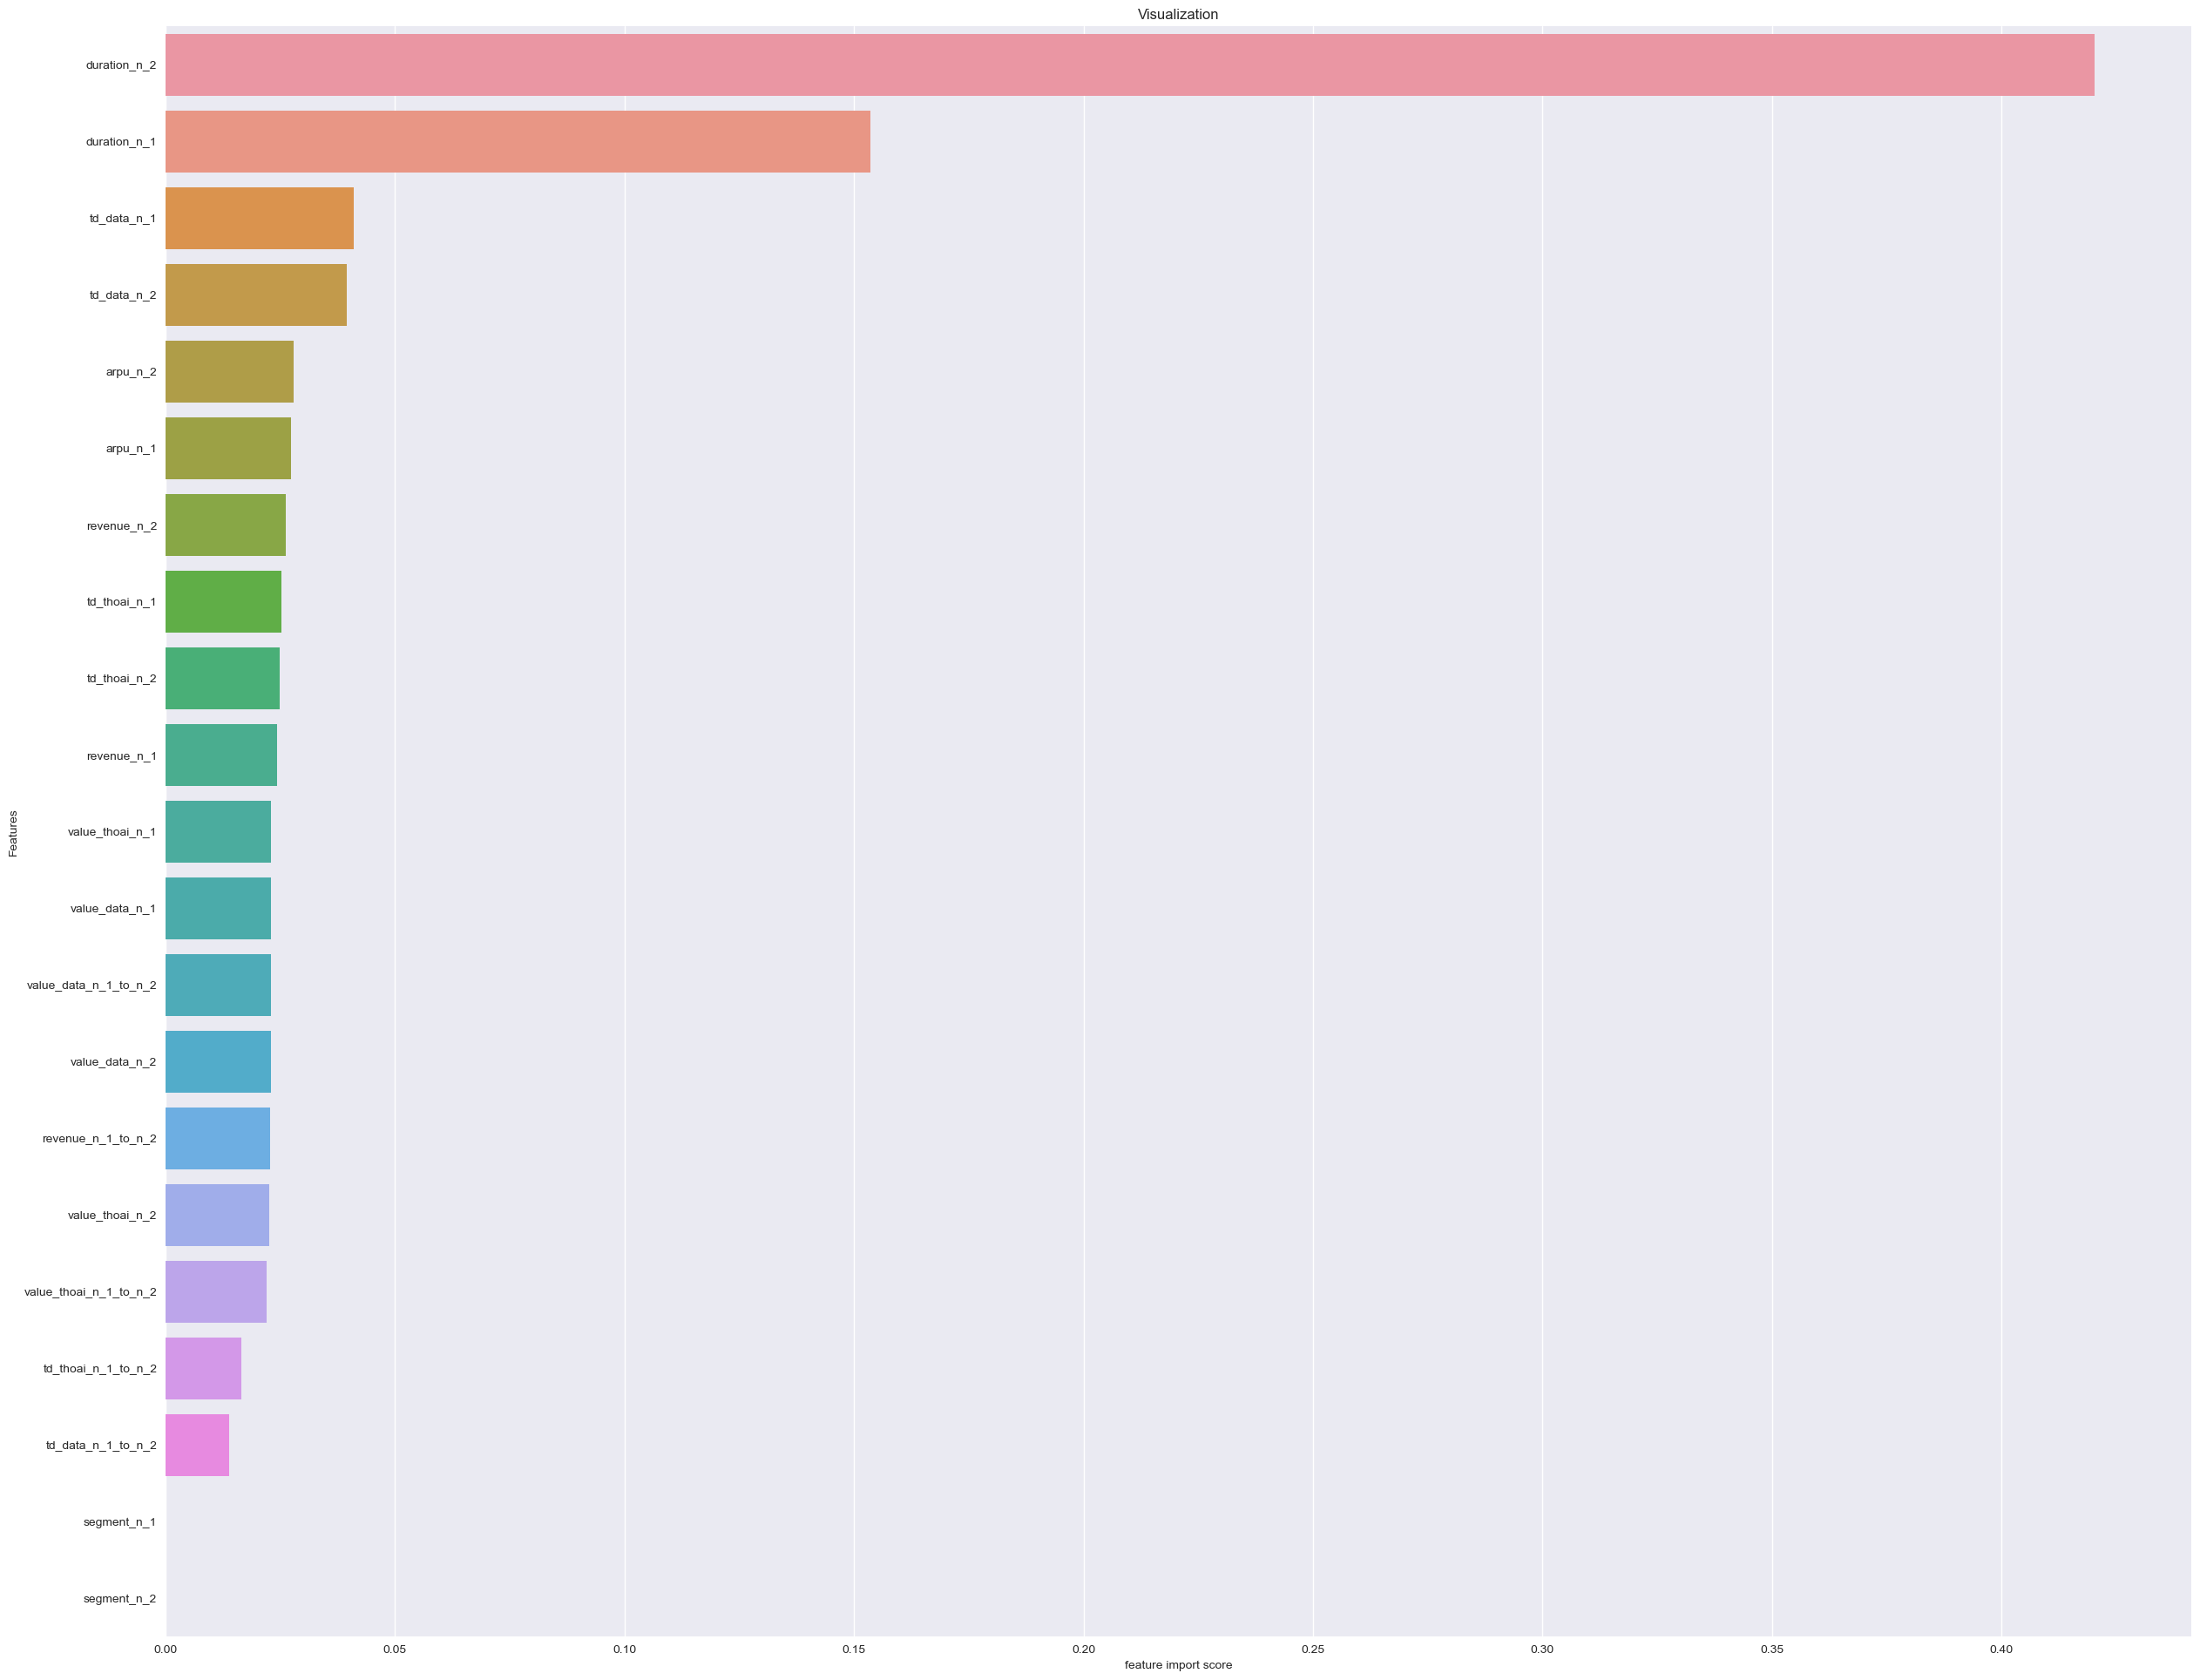

In [14]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y= feature_scores.index)
ax.set_title("Visualization")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel('feature import score')
ax.set_ylabel("Features")
plt.show()

#### remove some features

In [15]:
opt_features = features.drop(['segment_n_2','segment_n_1'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    shuffle=True, 
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
rf_eval = evaluate_model(rf, X_test, y_test)
print(rf_eval['cls_report'])


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17845
           1       0.85      0.84      0.84      5825

    accuracy                           0.92     23670
   macro avg       0.90      0.89      0.89     23670
weighted avg       0.92      0.92      0.92     23670



# Model Optimization

In [12]:
n_estimator_options = [1, 2, 3, 4, 5, 10, 20]
sample_leaf_options = [1, 2, 3, 4, 5, 10, 20]
max_feature_options = [None, 'sqrt', 0.2]

for n_est in n_estimator_options:
    for leaf_size in sample_leaf_options:
        for m_fea in max_feature_options:
            model = RandomForestClassifier(n_estimators=n_est, 
                                           n_jobs=-1, 
                                           random_state=0, 
                                           min_samples_leaf=leaf_size,
                                           max_features=m_fea)
            model.fit(X_train, y_train)
            model_eval = evaluate_model(model, X_test, y_test)
            print("#"*20 + f"n_estimators = {n_est}, min_sample_leafs = {leaf_size}, max_features = {m_fea}" + "#"*20)
            print(model_eval['cls_report'])


####################n_estimators = 1, min_sample_leafs = 1, max_features = None####################
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1799
           1       0.97      0.97      0.97     18016
           2       0.95      0.95      0.95        22
           3       0.72      0.71      0.71       473
           6       0.69      0.70      0.70       716
          12       0.80      0.80      0.80      1178

    accuracy                           0.94     22204
   macro avg       0.83      0.84      0.84     22204
weighted avg       0.94      0.94      0.94     22204

####################n_estimators = 1, min_sample_leafs = 1, max_features = sqrt####################
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1799
           1       0.97      0.97      0.97     18016
           2       0.88      0.68      0.77        22
           3       0.71      0.68      0

# Save Model

In [ ]:
from joblib import dump, load
dump(rf, '../model/random_forest.joblib')